Using Stacked regression

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor,Ridge,Lasso
import phik
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from mlxtend.regressor import StackingCVRegressor
warnings.filterwarnings('ignore')

Reading train and test csv files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Target variable

In [3]:
y = train['y']

Corelation matrix of the train data using phik

In [4]:
corelation_mat = train.phik_matrix()

interval columns not set, guessing: ['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 

#### 1.Label Encoding  categorical features

In [5]:
##Categorical columns
cat_columns=[]
for i in train.columns:
    if train[i].dtype =='O' or train[i].dtype =='float64':
        cat_columns.append(i)

Label encoding features

In [6]:
##Categorical train data
##Categorical train data
cat_train = train[cat_columns]
##Categorical test data
cat_columns.remove('y')
cat_test = test[cat_columns]

##Label encoding categorical features
for i in cat_columns:
    en = LabelEncoder()
    en.fit(list(train[i].values)+list(test[i].values))
    cat_train[i] = en.transform(train[i])
    cat_test[i] = en.transform(test[i])

Binary data

In [7]:
##Binary data
binary_columns=[]
for i in train.columns:
    if train[i].dtype =='int64':
        binary_columns.append(i)
binary_train = train[binary_columns]
binary_test = test[binary_columns]
# binary_train = pd.concat((train['y'],binary_train),axis=1)

In [8]:
X1_train = cat_train.drop('y',axis=1)
# X1_train = pd.concat([train['y'],X1_train],axis=1)
X1_train = pd.concat((cat_train,binary_train),axis=1)
X1_test = pd.concat((cat_test,binary_test),axis=1)

In [9]:
X =X1_train.drop('y',axis=1)

Stack 1 

In [11]:
param_grid1={'lasso__alpha': [0.1, 1.0, 10.0],
            'ridge__alpha': [0.1, 1.0, 10.0],
            'meta_regressor__n_estimators':[200,500],
           "meta_regressor__max_depth": [2,4,5]}

In [35]:
clf = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02,max_depth=3)
clf1 =Lasso()
clf2=Ridge()
regre = [clf,clf1,clf2]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=clf, 
                            use_features_in_secondary=True,cv=5)

In [27]:
para = {'max_depth':[2,4,6,8],'n_estimators':[200,300,400,500]}

In [42]:
params = {'xgbregressor_max_depth':[2,3,4],
            'lasso__alpha': [ 0.5,1.0,1.5],
          'ridge__alpha': [ 0.5,1.0,1.5],
          'meta_regressor__max_depth': [2,4,5]
         }

In [43]:
grid = GridSearchCV(stack,param_grid=param_grid1,cv=5,refit=True,n_jobs=-1)
grid.fit(X.values,y)

GridSearchCV(cv=5,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [44]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.6034283199470634

In [45]:
grid.best_params_

{'lasso__alpha': 1.0,
 'meta_regressor__max_depth': 2,
 'meta_regressor__n_estimators': 500,
 'ridge__alpha': 10.0}

In [48]:
os.mkdir('stacked1')

In [50]:

pred = grid.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_1.csv',index=False)

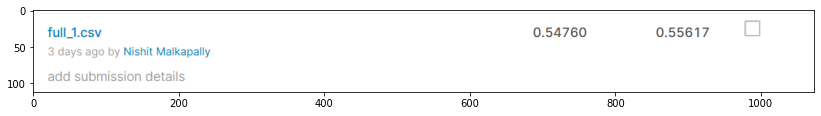

In [130]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full1.PNG')
plt.imshow(x)

In this stacked regression XGB,Lasso,Ridge are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54760 

Stack 2

In [79]:
params = {'xgbregressor__max_depth':[2,3,4],
            'lasso__alpha': [ 0.1,1.0,10],
          'ridge__alpha': [ 0.1,1.0,10],
          'meta_regressor__max_depth': [2,4,5]
         }

In [80]:
clf = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
clf1 =Lasso()
clf2=Ridge()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [81]:
grid = GridSearchCV(stack,param_grid=params,cv=5,refit=True,n_jobs=-1)
grid.fit(X.values,y)

GridSearchCV(cv=5,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [83]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5992637789922439

In [84]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_2.csv',index=False)

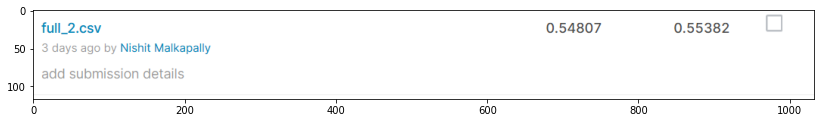

In [131]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full2.PNG')
plt.imshow(x)

In this stacked regression XGB,Lasso,Ridge are used as regressors and another XGB is used as a meta regressor with grid search and the best score is 0.54807

Stack 3

In [12]:
params = {'xgbregressor__max_depth':[2,3,4],
            'ridge__alpha': [ 0.1,1.0,10],
          'randomforestregressor__max_depth': [2,3,4],
          'meta_regressor__max_depth': [2,4,5]
         }

In [13]:
clf = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
clf1 =RandomForestRegressor(n_estimators=500)
clf2=Ridge()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [14]:
grid = GridSearchCV(stack,param_grid=params,cv=5,refit=True,n_jobs=-1)
grid.fit(X.values,y)

GridSearchCV(cv=5,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [15]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.6016262599483606

In [16]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_3.csv',index=False)

In [17]:
grid.best_params_

{'meta_regressor__max_depth': 2,
 'randomforestregressor__max_depth': 4,
 'ridge__alpha': 1.0,
 'xgbregressor__max_depth': 2}

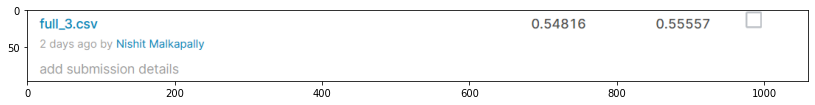

In [133]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full3.PNG')
plt.imshow(x)

In this stacked regression XGB,Random forest,Ridge are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54816 

Stack 4

In [19]:
params = {'xgbregressor__max_depth':[2,3,4],
            'ridge__alpha': [ 0.1,1.0,10],
          'lasso__alpha':[0,1,1,10],
          'randomforestregressor__max_depth': [2,3,4],
          'meta_regressor__max_depth': [2,4,5]
         }

In [21]:
clf = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
clf1 =RandomForestRegressor(n_estimators=500)
clf2=Ridge()
clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2,clf3]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [22]:
grid = GridSearchCV(stack,param_grid=params,cv=5,refit=True,n_jobs=-1,verbose=1)
grid.fit(X.values,y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 156.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 274.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 428.2min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 559.6min finished


GridSearchCV(cv=5,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [23]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.6012045424210005

In [24]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_4.csv',index=False)

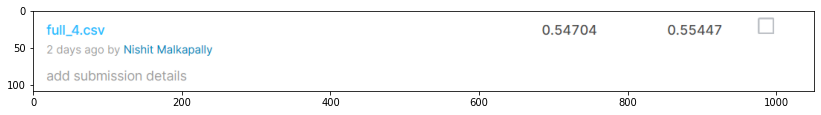

In [134]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full4.PNG')
plt.imshow(x)

In this stacked regression XGB,Random forest,Ridge,Lasso are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54704 

Stack 5

In [12]:
params = {
            'ridge__alpha': [ 0.1,1.0,10],
          'lasso__alpha':[0,1,10],
          'randomforestregressor__max_depth': [2,3,4],
          'meta_regressor__max_depth': [2,4,5]
         }

In [13]:
clf = LinearRegression()
clf1 =RandomForestRegressor(n_estimators=500)
clf2=Ridge()
clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2,clf3]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [14]:
grid = GridSearchCV(stack,param_grid=params,cv=4,refit=True,n_jobs=-1,verbose=5)
grid.fit(X.values,y)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 87.6min finished


GridSearchCV(cv=4,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [15]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5986918297969405

In [16]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_5.csv',index=False)

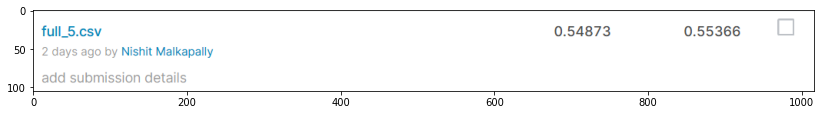

In [3]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full5.PNG')
plt.imshow(x)

In this stacked regression Linear ,Random forest,Ridge,Lasso are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54873

Stack 6

In [18]:
params = {
            'svr__C': [ 0.1,1.0,10],
          'lasso__alpha':[0,1,10],
          'randomforestregressor__max_depth': [2,3,4],
          'meta_regressor__max_depth': [2,4,5]
         }

In [19]:
clf = LinearRegression()
clf1 =RandomForestRegressor(n_estimators=500)
clf2=SVR()
clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2,clf3]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [20]:
grid = GridSearchCV(stack,param_grid=params,cv=4,refit=True,n_jobs=-1,verbose=5)
grid.fit(X.values,y)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 58.4min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 102.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 123.6min finished


GridSearchCV(cv=4,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [21]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5939631179884336

In [22]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_6.csv',index=False)

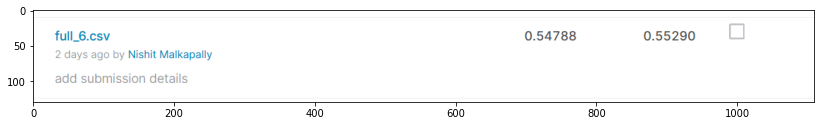

In [137]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full6.PNG')
plt.imshow(x)

In this stacked regression Linear,Random forest,SVR,Lasso are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54788

Stack 7

In [23]:
params = {
            'svr__C': [ 0.1,1.0,10],
          'xgbregressor__max_depth':[2,3,4],
          'randomforestregressor__max_depth': [2,3,4],
          'meta_regressor__max_depth': [2,4,5]
         }

In [24]:
clf = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
clf1 =RandomForestRegressor(n_estimators=500)
clf2=SVR()
# clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [25]:
grid = GridSearchCV(stack,param_grid=params,cv=4,refit=True,n_jobs=-1,verbose=5)
grid.fit(X.values,y)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 151.4min finished


GridSearchCV(cv=4,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [26]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5969768405130293

In [27]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_7.csv',index=False)

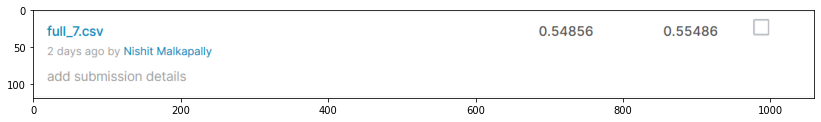

In [138]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full7.PNG')
plt.imshow(x)

In this stacked regression XGB,Random forest,SVR are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54856

Stack 8

In [28]:
params = {
            'svr__C': [ 0.1,1.0,10],
          'randomforestregressor__max_depth': [2,3,4],
          'meta_regressor__max_depth': [2,4,5]
         }

In [29]:
clf = LinearRegression()
clf1 =RandomForestRegressor(n_estimators=500)
clf2=SVR()
# clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf2]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [30]:
grid = GridSearchCV(stack,param_grid=params,cv=4,refit=True,n_jobs=-1,verbose=5)
grid.fit(X.values,y)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 41.0min finished


GridSearchCV(cv=4,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [31]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5961026410638604

In [32]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_8.csv',index=False)

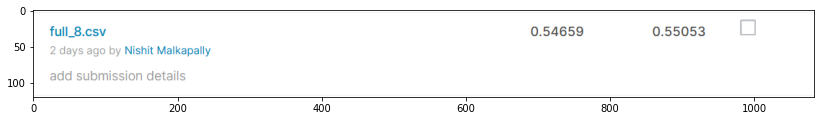

In [139]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full8.PNG')
plt.imshow(x)

In this stacked regression Linear,Random forest,SVR are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54659

Stack 9

In [35]:
params = {
            'lasso__alpha': [0.1,1.0,10,15],
          'randomforestregressor__max_depth': [2,3,4,5],
          'meta_regressor__max_depth': [2,4,5,6]
         }

In [36]:
clf = LinearRegression()
clf1 =RandomForestRegressor(n_estimators=500)
clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=500,eta=0.02)
regre = [clf,clf1,clf3]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [37]:
grid = GridSearchCV(stack,param_grid=params,cv=4,refit=True,n_jobs=-1,verbose=5)
grid.fit(X.values,y)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed: 71.3min finished


GridSearchCV(cv=4,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [38]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5948402729981637

In [39]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_9.csv',index=False)

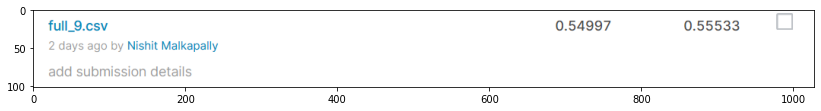

In [140]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full9.PNG')
plt.imshow(x)

In this stacked regression Linear,Random forest,Ridge,Lasso are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54997

Stack 10

In [11]:
params = {
            'lasso__alpha': [0.1,1.0,10,15],
          'randomforestregressor__max_depth': [2,3,4,5],
    'randomforestregressor__n_estimators': [250,300,500],
          'meta_regressor__max_depth': [2,4,5,6],
    'meta_regressor__n_estimators':[250,300,500]
         }

In [12]:
clf = LinearRegression()
clf1 =RandomForestRegressor()
clf3 = Lasso()
meta = xgb.XGBRegressor(objective='reg:squarederror',eta=0.02)
regre = [clf,clf1,clf3]
stack = StackingCVRegressor(regressors=regre,
                            meta_regressor=meta, 
                            use_features_in_secondary=True,cv=5)

In [13]:
grid = GridSearchCV(stack,param_grid=params,cv=4,refit=True,n_jobs=-1,verbose=5)
grid.fit(X.values,y)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 95.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 135.5min
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 183.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 242.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 302.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 368.2min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed: 440.5min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 469.3min finished


GridSearchCV(cv=4,
             estimator=StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                       booster=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       eta=0.02,
                                                                       gamma=None,
                                                                       gpu_id=None,
                                                                       importance_type='gain',
                                                                       interaction_constraints=None,
                                                                       learning_r

In [14]:
r2_score(y,grid.best_estimator_.predict(X.values))

0.5892558226575912

In [15]:
grid.best_params_

{'lasso__alpha': 10,
 'meta_regressor__max_depth': 2,
 'meta_regressor__n_estimators': 300,
 'randomforestregressor__max_depth': 2,
 'randomforestregressor__n_estimators': 250}

In [16]:
best2 = grid.best_estimator_
pred = best2.predict(X1_test.values)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/full_10.csv',index=False)

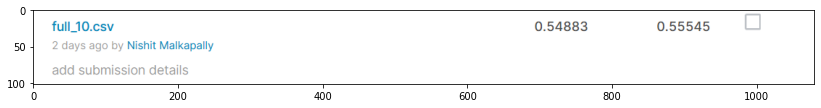

In [141]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/full10.PNG')
plt.imshow(x)

In this stacked regression Linear,Random forest,Lasso are used as regressors and XGB is used as a meta regressor with grid search and the best score is 0.54883

XGB on target values less than 200 and top 260 features

In [10]:
params1={}
params1['eta']=[0.02,0.01]
params1['n_estimators']=[300,400,500]
params1['max_depth']=[2,3]
params1['objective'] = ['reg:linear']


In [13]:
top_100_features = corelation_mat['y'].sort_values(ascending=False)[0:260]
top_100_features=top_100_features.drop('y')
X2_test = X1_test[top_100_features.index]
X2_train = X1_train.iloc[train[train['y']<175].index]
y2 = y[train[train['y']<175].index]
X2_train = X2_train[top_100_features.index]

In [15]:
X2_test

,X339,X0,X236,X314,X261,X127,X2,X54,X136,X76,...,X196,X342,X135,X326,X226,X152,X63,X212,X252,X90
0,0,24,0,0,0,0,38,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,46,0,0,0,1,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,24,0,0,0,0,19,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,24,0,0,0,0,38,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,49,0,1,1,0,19,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,9,0,1,1,0,19,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,46,0,0,0,1,9,0,1,0,...,0,0,0,1,1,1,0,0,0,0
4206,0,51,0,0,0,1,19,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,10,0,1,1,0,19,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
params1={}
params1['eta']=[0.06,0.04,0.02]
params1['n_estimators']=[250,500,750,1000]
params1['max_depth']=[2,4,6,8]
params1['objective'] = ['reg:linear']
params1['reg_lambda']=[0,1,2]
# params1['interaction_constraints']='[[314,315],[229,339]]'

In [17]:
clf = xgb.XGBRegressor(objective='reg:linear',)
grid3 = GridSearchCV(clf,params1,scoring='r2',cv=2,n_jobs=-1,verbose=5)
grid3.fit(X2_train,y2)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  6.8min finished


[13:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
         

In [23]:
best = grid3.best_estimator_

In [ ]:
a = 

In [22]:
best.predict(X2_test.iloc[0].values.reshape(1,-1))

ValueError: feature_names mismatch: ['X339', 'X0', 'X236', 'X314', 'X261', 'X127', 'X2', 'X54', 'X136', 'X76', 'X232', 'X263', 'X29', 'X279', 'X162', 'X313', 'X328', 'X276', 'X272', 'X250', 'X178', 'X166', 'X48', 'X113', 'X134', 'X222', 'X147', 'X111', 'X198', 'X234', 'X80', 'X264', 'X348', 'X126', 'X66', 'X316', 'X120', 'X52', 'X130', 'X128', 'X61', 'X170', 'X179', 'X119', 'X118', 'X306', 'X251', 'X238', 'X191', 'X378', 'X14', 'X169', 'X315', 'X304', 'X101', 'X98', 'X28', 'X275', 'X3', 'X189', 'X224', 'X185', 'X51', 'X1', 'X265', 'X75', 'X215', 'X19', 'X223', 'X108', 'X300', 'X286', 'X208', 'X368', 'X371', 'X228', 'X229', 'X43', 'X115', 'X159', 'X8', 'X46', 'X156', 'X157', 'X148', 'X6', 'X292', 'X68', 'X35', 'X37', 'X31', 'X274', 'X187', 'X209', 'X311', 'X5', 'X47', 'X84', 'X244', 'X71', 'X17', 'X382', 'X150', 'X273', 'X256', 'X355', 'X96', 'X180', 'X64', 'X301', 'X85', 'X363', 'X205', 'X204', 'X346', 'X197', 'X325', 'X354', 'X367', 'X360', 'X155', 'X331', 'X79', 'X129', 'X362', 'X241', 'X352', 'X49', 'X349', 'X343', 'X351', 'X218', 'X114', 'X194', 'X186', 'X100', 'X4', 'X20', 'X171', 'X383', 'X132', 'X144', 'X376', 'X165', 'X151', 'X267', 'X69', 'X255', 'X334', 'X50', 'X283', 'X117', 'X81', 'X221', 'X337', 'X12', 'X317', 'X55', 'X142', 'X158', 'X350', 'X310', 'X220', 'X312', 'X22', 'X44', 'X302', 'X336', 'X172', 'X62', 'X216', 'X23', 'X322', 'X103', 'ID', 'X16', 'X271', 'X195', 'X153', 'X183', 'X324', 'X58', 'X379', 'X137', 'X131', 'X201', 'X237', 'X78', 'X109', 'X140', 'X168', 'X138', 'X146', 'X163', 'X344', 'X143', 'X70', 'X309', 'X225', 'X358', 'X56', 'X219', 'X246', 'X34', 'X154', 'X277', 'X231', 'X308', 'X211', 'X174', 'X176', 'X285', 'X318', 'X239', 'X53', 'X214', 'X102', 'X321', 'X329', 'X18', 'X45', 'X373', 'X370', 'X377', 'X323', 'X206', 'X125', 'X227', 'X86', 'X13', 'X21', 'X287', 'X112', 'X199', 'X247', 'X202', 'X161', 'X110', 'X167', 'X380', 'X374', 'X27', 'X182', 'X177', 'X266', 'X262', 'X184', 'X291', 'X116', 'X196', 'X342', 'X135', 'X326', 'X226', 'X152', 'X63', 'X212', 'X252', 'X90'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258']
expected X62, X4, X13, X239, X148, X85, X324, X172, X362, X312, X182, X98, X129, X23, X317, X370, X51, X117, X120, X184, X126, X80, X343, X376, X231, X383, X125, X76, X314, X180, X113, X161, X328, X196, X168, X2, X171, X178, X134, X368, X283, X214, X313, X232, X53, X261, X27, X46, X311, X166, X244, X16, X151, X323, X318, X227, X8, X225, X3, X209, X50, X118, X267, X69, X63, X185, X137, X241, X336, X276, X96, X138, X286, X130, X354, X264, X58, X70, X348, X157, X86, X215, X271, X272, X128, X197, X156, X279, X52, X300, X158, X222, X179, X224, X206, X251, X246, X202, X373, X169, X116, X55, X71, X140, X61, X355, X146, X308, X167, X329, X218, X135, X100, X229, X119, X187, X22, X195, X301, X247, X48, X234, X47, X189, X351, X292, X162, X371, X66, X216, X131, X263, X285, X159, X358, X19, X223, X136, X342, X221, X1, X198, X101, X220, X68, X377, X29, X78, X273, X150, X201, X379, X325, X322, X339, X262, X163, X56, X316, X45, X43, X6, X132, X170, X331, X155, X352, X374, X35, X252, ID, X37, X219, X154, X14, X228, X277, X81, X310, X18, X344, X176, X75, X266, X127, X226, X174, X350, X275, X109, X212, X304, X20, X205, X208, X315, X183, X367, X111, X380, X165, X79, X144, X152, X90, X378, X147, X321, X110, X64, X108, X238, X334, X114, X142, X103, X236, X211, X49, X256, X44, X265, X102, X191, X115, X17, X346, X194, X255, X204, X274, X5, X382, X12, X302, X199, X34, X360, X326, X250, X337, X177, X309, X54, X287, X291, X31, X28, X84, X186, X0, X363, X306, X112, X237, X349, X143, X21, X153 in input data
training data did not have the following fields: f14, f92, f109, f6, f68, f202, f112, f248, f85, f90, f114, f237, f4, f118, f17, f89, f163, f258, f81, f23, f126, f132, f139, f31, f168, f241, f93, f174, f228, f125, f5, f137, f53, f134, f154, f223, f191, f224, f44, f211, f252, f32, f186, f0, f69, f253, f98, f57, f149, f208, f227, f35, f101, f99, f160, f43, f60, f243, f9, f119, f232, f167, f128, f176, f170, f200, f156, f196, f123, f178, f203, f108, f18, f226, f40, f22, f67, f73, f247, f135, f201, f190, f66, f88, f54, f106, f182, f65, f217, f238, f171, f155, f70, f239, f96, f193, f94, f172, f173, f166, f76, f34, f187, f29, f41, f133, f221, f251, f249, f222, f28, f197, f27, f198, f77, f205, f216, f10, f3, f13, f162, f55, f246, f15, f1, f225, f115, f136, f153, f58, f175, f11, f8, f33, f95, f36, f120, f165, f233, f206, f20, f235, f179, f79, f220, f147, f24, f151, f213, f214, f230, f229, f161, f105, f159, f177, f61, f56, f240, f72, f117, f100, f242, f152, f212, f180, f75, f164, f59, f110, f199, f234, f144, f204, f215, f82, f257, f21, f78, f103, f194, f46, f49, f169, f210, f250, f244, f84, f195, f254, f127, f97, f231, f91, f188, f62, f63, f146, f7, f87, f141, f142, f218, f255, f158, f130, f52, f16, f25, f2, f140, f209, f256, f51, f122, f129, f131, f189, f71, f83, f207, f184, f192, f107, f183, f181, f42, f39, f86, f185, f138, f150, f236, f219, f48, f113, f116, f47, f102, f38, f12, f80, f30, f143, f157, f245, f104, f121, f64, f19, f45, f50, f74, f111, f145, f148, f124, f37, f26

In [15]:
r2_score(y2,grid3.best_estimator_.predict(X2_train))

0.6192887433390156

In [182]:
best2 = grid3.best_estimator_
pred = best2.predict(X2_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/x1.csv',index=False)

In [16]:
best_para = grid3.best_params_

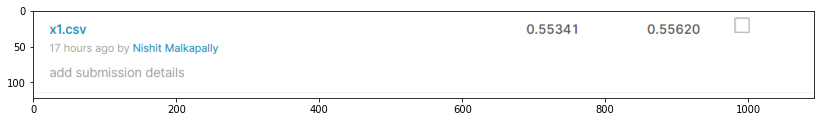

In [4]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/x1.PNG')
plt.imshow(x)

Using XGB with grid search on data with target values less than 200 and selecting top 260 features model ahs best score sor far of 0.55341

#### XGB with same paramenters but removing Feature ID 

In [115]:
X3 = X2_train.drop('ID',axis=1)
X3_test = X2_test.drop('ID',axis=1)

In [116]:
best_para

{'eta': 0.02,
 'max_depth': 2,
 'n_estimators': 500,
 'objective': 'reg:linear',
 'reg_lambda': 2}

In [117]:
best = xgb.XGBRegressor(n_estimators=500,max_depth=2,eta=0.02,objective='reg:squarederror',reg_lambda=2,interaction_constraints = '[[331,0,229],[306,307,2]]')

In [118]:
X.columns.get_loc('X314')

306

In [119]:
corelation_mat['y'].sort_values(ascending=False)[:10]

X339    1.000000
y       1.000000
X0      0.751650
X236    0.659690
X314    0.532702
X261    0.518549
X127    0.465000
X2      0.458670
X54     0.314066
X136    0.314066
Name: y, dtype: float64

In [120]:
best.interaction_constraints = '[[331,0,229]]'

In [121]:
best.interaction_constraints

'[[331,0,229]]'

In [125]:
best.fit(X3,y2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02, gamma=0,
             gpu_id=-1, importance_type='gain',
             interaction_constraints='[[331,0,229]]',
             learning_rate=0.0199999996, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
r2_score(y2,best.predict(X3))

0.5863662130217953

In [127]:
pred = best.predict(X3_test)
prediction = pd.DataFrame()
prediction['ID'] = test['ID']
prediction['y'] = pred
prediction.to_csv('stacked1/x2.csv',index=False)

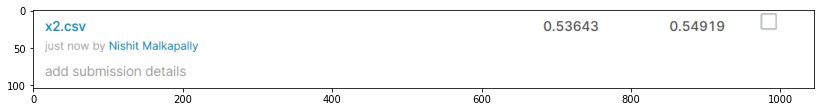

In [143]:
plt.figure(figsize=(14,6))
x = plt.imread('stacked1/x2.PNG')
plt.imshow(x)

By removing feature 'Id' models performance is decreased with r2 score of 0.53643

In [144]:
from  prettytable import PrettyTable

In [156]:
x = PrettyTable()
x.field_names = ['S.no','Regressor','meta_regressor','Score']
x.add_row(['1','XGB,Lasso,Ridge','XGB','0.54760'])
x.add_row(['2','XGB,Lasso,Ridge','XGB','0.54807'])
x.add_row(['3','XGB,Random Forest,Ridge','XGB','0.54816'])
x.add_row(['4','XGB,Random Forest,Lasso,Ridge','XGB','0.54704'])
x.add_row(['5','Linear,Random Forest,Ridge,Lasso','XGB','0.54873'])
x.add_row(['6','Linear,Random Forest,SVR,Lasso','XGB','0.54788'])
x.add_row(['7','XGB,Random Forest,SVR','XGB','0.54856'])
x.add_row(['8','Linear,Random Forest,SVR','XGB','0.54656'])
x.add_row(['9','Linear,Random Forest,Lasso','XGB','0.54997'])
x.add_row(['10','Linear,Random Forest,Lasso','XGB','0.54883'])
x.add_row(['11','XGB','--','0.55341'])
x.add_row(['12','XGB','--','0.53634'])

In [157]:
print(x)

+------+----------------------------------+----------------+---------+
| S.no |            Regressor             | meta_regressor |  Score  |
+------+----------------------------------+----------------+---------+
|  1   |         XGB,Lasso,Ridge          |      XGB       | 0.54760 |
|  2   |         XGB,Lasso,Ridge          |      XGB       | 0.54807 |
|  3   |     XGB,Random Forest,Ridge      |      XGB       | 0.54816 |
|  4   |  XGB,Random Forest,Lasso,Ridge   |      XGB       | 0.54704 |
|  5   | Linear,Random Forest,Ridge,Lasso |      XGB       | 0.54873 |
|  6   |  Linear,Random Forest,SVR,Lasso  |      XGB       | 0.54788 |
|  7   |      XGB,Random Forest,SVR       |      XGB       | 0.54856 |
|  8   |     Linear,Random Forest,SVR     |      XGB       | 0.54656 |
|  9   |    Linear,Random Forest,Lasso    |      XGB       | 0.54997 |
|  10  |    Linear,Random Forest,Lasso    |      XGB       | 0.54883 |
|  11  |               XGB                |       --       | 0.55341 |
|  12 

### Summary:
- Used different combinations of regressors in stacked regressions with XGB as meta regressor for every stack using grid search.
- Using best estimators predicted the r2 score for every stack
- Stack with linear,Random forest and Lasso has best r2 score of 0.54997 
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700
- Suggestions from above link like interaction combinations of features for XGB and also removed feature Id but models performance is not improved
- Instead of using stacked models XGB with grid search on top 260 features with targte values less than 200 has best r2 score of 0.55341 which is like top 1% in Private LB
 